In [2]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from matplotlib import font_manager, rc
import platform
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# 그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats
# 사이킷런 ≥0.20 필수 : 0.20에서 데이터 변환을 위한 Transformer클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈련용 데이터가
# 자주 변경이 되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)

import pandas as pd
import numpy as np


In [3]:
# 데이터 읽어오기
movies = pd.read_csv('./data/data/data/tmdb/tmdb_5000_movies.csv')
print(movies.shape) #(4803,20)

(4803, 20)


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### 필요한 피처만 추출

In [5]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

print(movies_df[['genres','keywords']][:1])

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  
0  [{"id": 1463, "name": "culture clash"}, {"id":...  


In [6]:
# 장르와 키워드는 문자열인데 포맷이 python의 list로 되어있음
# 이 때 사용하는 함수는 eval이나 ast 패키지의 literal_eval 함수
from ast import literal_eval
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

# genres와 keywords의 dict에서 name에 해당하는 값만 추출해서 list로 생성
movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])
print(movies_df[['genres','keywords']][:1])

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\1304697766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(literal_eval)


                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                            keywords  
0  [culture clash, future, space war, space colon...  


C:\Users\USER\AppData\Local\Temp\ipykernel_7916\1304697766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\1304697766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\1304697766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [8]:
# 장르별 유사도 측정을 위해서 장르를 피처 벡터 행렬로 생성
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 0.0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)


(4803, 276)


C:\Users\USER\AppData\Local\Temp\ipykernel_7916\218545881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))


In [9]:
# 코사인 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim[:2])

[[1.    0.596 0.447 ... 0.    0.    0.   ]
 [0.596 1.    0.4   ... 0.    0.    0.   ]]


In [10]:
# 유사도 정렬
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])
# 여기서 출력되는 값은 유사도가 높은 행의 인덱스

[[   0 3494  813 ... 3038 3037 2401]]


In [11]:
# 장르의 유사도를 이용한 영화 추천 함수
def find_sim_movie(df, sorted_ind, title, top_n=10):
    # 제목을 가지고 영화 찾기
    title_movie = df[df['title'] == title]
    # 영화의 인덱스 찾기
    title_index = title_movie.index.values
    # 유사도 행렬 찾아오기
    similar_indexes = sorted_ind[title_index, :(top_n)]
    similar_indexes = similar_indexes.reshape(-1) # flatten 도 가능
    return df.iloc[similar_indexes]


In [12]:
# 영화 추천
#movies_df['title']
similar_movies = find_sim_movie(movies_df,genre_sim_sorted_ind, 'The Godfather', 15)
print(similar_movies[['title','vote_average']])

# 장르를 기준으로 추천리스트가 나왔더니 점수가 0점인 Mi America 도 들어가버리는 문제가 발생

                                               title  vote_average
2731                          The Godfather: Part II           8.3
1243                                    Mean Streets           7.2
3636                                   Light Sleeper           5.7
1946  The Bad Lieutenant: Port of Call - New Orleans           6.0
2640         Things to Do in Denver When You're Dead           6.7
4065                                      Mi America           0.0
1847                                      GoodFellas           8.2
4217                                            Kids           6.8
883                              Catch Me If You Can           7.7
3866                                     City of God           8.1
3112                         Blood Done Sign My Name           6.0
4041                                 This Is England           7.4
588                  Wall Street: Money Never Sleeps           5.8
3337                                   The Godfather          

In [13]:
# 영화의 평점을 내림차순으로 정렬해서 10개 확인
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


In [14]:
# 가중 평점 구하기
C = movies_df['vote_average'].mean() #전체 영화의 평균 점수
m = movies_df['vote_count'].quantile(0.5) # 최소 리뷰의 개수(50%로 지정)
print(C)
print(m)


6.092171559442016
235.0


In [15]:
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return((v/(v+m)) * R) + ((m/(m+v)) * C)

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',ascending=False)[:10]


C:\Users\USER\AppData\Local\Temp\ipykernel_7916\438949666.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)


,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.432957,8205
3337,The Godfather,8.4,8.311498,5893
662,Fight Club,8.3,8.246223,9413
3232,Pulp Fiction,8.3,8.240109,8428
1818,Schindler's List,8.3,8.186319,4329
3865,Whiplash,8.3,8.184420,4254
2294,Spirited Away,8.3,8.172677,3840
65,The Dark Knight,8.2,8.159521,12002
2731,The Godfather: Part II,8.3,8.154789,3338
809,Forrest Gump,8.2,8.139311,7927


In [16]:
# 장르의 유사도와 가중 평점을 이용해서 추천을 해주는 함수
def find_sim_movie(df, sorted_ind, title, top_n=10):
    # 제목을 가지고 영화 찾기
    title_movie = df[df['title'] == title]
    # 영화의 인덱스 찾기
    title_index = title_movie.index.values
    
    # 유사도 행렬 찾아오기
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1) # flatten 도 가능
    # 현재 영화는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    return df.iloc[similar_indexes].sort_values('weighted_vote',ascending=False)[:top_n]


In [17]:
similar_movies = find_sim_movie(movies_df,genre_sim_sorted_ind, 'The Godfather', 15)
print(similar_movies[['title','vote_average', 'weighted_vote']])

                            title  vote_average  weighted_vote
1881     The Shawshank Redemption           8.5       8.432957
2731       The Godfather: Part II           8.3       8.154789
1847                   GoodFellas           8.2       8.052709
3866                  City of God           8.1       7.869722
1663  Once Upon a Time in America           8.2       7.820138
3887                Trainspotting           7.8       7.661128
883           Catch Me If You Can           7.7       7.606243
892                        Casino           7.8       7.539728
281             American Gangster           7.4       7.223063
4041              This Is England           7.4       6.886054
1243                 Mean Streets           7.2       6.751138
1149              American Hustle           6.8       6.745319
2582   The Place Beyond the Pines           6.8       6.711896
2839                     Rounders           6.9       6.618339
4217                         Kids           6.8       6

## 아이템 기반 개인화된 영화 추천

### 데이터 가져오기

In [18]:
movies = pd.read_csv('./data/data/data/movielens/movies.csv')
ratings = pd.read_csv('./data/data/data/movielens/ratings.csv')

### 데이터 탐색

In [19]:
# 피처와 행의 개수 파악
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [20]:
# 영화 정보 확인
# 각 피처의 자료형과 결측값 여부 등을 확인
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [22]:
#print(ratings['userId'].unique())
#print(ratings['movieId'].unique())
#print(ratings['rating'].unique())
print(ratings['timestamp'].unique())

[ 964982703  964981247  964982224 ... 1494273047 1493846352 1493846415]


In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
# ratings 수정
# 시간은 의미가 없을 것 같아서 제거
ratings = ratings[['userId', 'movieId','rating']]
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [25]:
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
print(ratings_matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     NaN     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
608         2.5     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
609         3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
610         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   

movieId  9       10     

In [26]:
# movieId를 영화 제목으로 변경
# ratings와 movies를 합치기

rating_movies = pd.merge(ratings, movies, on='movieId')
#print(rating_movies.head())
ratings_matrix = rating_movies.pivot_table('rating',index='userId', columns='title')
print(ratings_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2              

In [27]:
# NAN을 0으로 치환
ratings_matrix = ratings_matrix.fillna(0)
print(ratings_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   
...            ...                                      ...   
606            0.0                                      0.0   
607            0.0                                      0.0   
608            0.0                                      0.0   
609            0.0                                      0.0   
610            4.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2              

In [28]:
# 영화간 유사도 산출 - 유사도를 계산할 항목이 인덱스
ratings_matrix_T = ratings_matrix.transpose()
print(ratings_matrix_T)

userId                                     1    2    3    4    5    6    7    \
title                                                                          
'71 (2014)                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Hellboy': The Seeds of Creation (2004)    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Round Midnight (1986)                     0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Salem's Lot (2004)                        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
'Til There Was You (1997)                  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                        ...  ...  ...  ...  ...  ...  ...   
eXistenZ (1999)                            0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx (2002)                                 0.0  0.0  0.0  0.0  0.0  0.0  0.0   
xXx: State of the Union (2005)             0.0  0.0  0.0  0.0  0.0  0.0  0.0   
¡Three Amigos! (1986)                      4.0  0.0  0.0  0.0  0.0  0.0  0.0   
À nous la liberté (Freedom for Us) (1931

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
#print(item_sim)
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df)

title                                      '71 (2014)  \
title                                                   
'71 (2014)                                   1.000000   
'Hellboy': The Seeds of Creation (2004)      0.000000   
'Round Midnight (1986)                       0.000000   
'Salem's Lot (2004)                          0.000000   
'Til There Was You (1997)                    0.000000   
...                                               ...   
eXistenZ (1999)                              0.000000   
xXx (2002)                                   0.139431   
xXx: State of the Union (2005)               0.327327   
¡Three Amigos! (1986)                        0.000000   
À nous la liberté (Freedom for Us) (1931)    0.000000   

title                                      'Hellboy': The Seeds of Creation (2004)  \
title                                                                                
'71 (2014)                                                                0.000000   


In [30]:
# 영화를 가지고 유사도가 가장 높은 영화를 추천
# 자기 자신과 유사도를 측정하면 1이 됨
# 추천을 할 때는 자신을 제외하고 추천을 해야 함 -> [1:10] 처럼 1부터로 설정하기

item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:11]


title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Interstellar (2014)              0.608150
Up (2009)                        0.606173
Avengers, The (2012)             0.586504
Django Unchained (2012)          0.581342
Departed, The (2006)             0.580849
Name: Inception (2010), dtype: float64

### 개인화된 평점 계산

In [31]:
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [32]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                  columns=ratings_matrix.columns)
print(ratings_pred_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.070345                                 0.577855   
2         0.018260                                 0.042744   
3         0.011884                                 0.030279   
4         0.049145                                 0.277628   
5         0.007278                                 0.066951   
...            ...                                      ...   
606       0.246832                                 1.293006   
607       0.052248                                 0.305255   
608       0.324435                                 1.022541   
609       0.004835                                 0.053593   
610       3.628303                                 1.517918   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     0.321696             0.227055   
2              

In [33]:
from sklearn.metrics import mean_squared_error

# 예측값과 실제 값의 차이를 구해주는 함수
def get_mse(pred, actual):
    # zero인 데이터를 제거하고 1차원 배열로 변환
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    
    return mean_squared_error(pred, actual)

# MSE는 오차를 제곱한 값
print("MES :", get_mse(ratings_pred, ratings_matrix.values))


MES : 9.895354759094706


In [34]:
# 유사도가 높은 영화만을 가지고 예측을 수행하는 함수
def predict_rating_topsim(ratings_arr, item_sim_arr, n = 20 ) :
    pred = np.zeros(ratings_arr.shape)
    
    for col in range(ratings_arr.shape[1]):
        top_n_items = [np.argsort(item_sim_arr[:, col])[:n-1:-1]]
        
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
    return pred

In [35]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print("MSE:", get_mse(ratings_pred, ratings_matrix.values))

MSE: 9.895354759094706


In [36]:
# 계산된 예측 평점 데이터를 DataFrame으로 변환
ratings_pred_matrix = pd.DataFrame(data=ratings_pred,
                                  index=ratings_matrix.index,
                                  columns = ratings_matrix.columns)

# 유저 정보를 가지고 추천
user_rating_id = ratings_matrix.loc[9,:]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [37]:
# 유저가 보지 않은 영화 리스트를 생성해주는 함수
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId, :]
    # 평점이 0을 초과한 데이터는 이미 본 영화
    already_seen = user_rating[user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list
    
    

In [38]:
# 유저가 보지 않은 영화 중에서 예측 평점이 높은 영화를 추천해주는 함수
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [39]:
# 사용자가 보지 않은 영화 확인
unseen_list = get_unseen_movies(ratings_matrix,9)
print(unseen_list)

["'71 (2014)", "'Hellboy': The Seeds of Creation (2004)", "'Round Midnight (1986)", "'Salem's Lot (2004)", "'Til There Was You (1997)", "'Tis the Season for Love (2015)", "'burbs, The (1989)", "'night Mother (1986)", '(500) Days of Summer (2009)', '*batteries not included (1987)', '...All the Marbles (1981)', '...And Justice for All (1979)', '00 Schneider - Jagd auf Nihil Baxter (1994)', '1-900 (06) (1994)', '10 (1979)', '10 Cent Pistol (2015)', '10 Cloverfield Lane (2016)', '10 Items or Less (2006)', '10 Things I Hate About You (1999)', '10 Years (2011)', '10,000 BC (2008)', '100 Girls (2000)', '100 Streets (2016)', '101 Dalmatians (1996)', '101 Dalmatians (One Hundred and One Dalmatians) (1961)', "101 Dalmatians II: Patch's London Adventure (2003)", '101 Reykjavik (101 Reykjavík) (2000)', '102 Dalmatians (2000)', '10th & Wolf (2006)', '10th Kingdom, The (2000)', '10th Victim, The (La decima vittima) (1965)', '11\'09"01 - September 11 (2002)', '11:14 (2003)', '11th Hour, The (2007)', 

In [40]:
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
recomm_movies = pd.DataFrame(data = recomm_movies.values,
                            index = recomm_movies.index,
                            columns = ['pred_score'])
print(recomm_movies)

                                                    pred_score
title                                                         
Venom (1982)                                          0.303278
Dr. Goldfoot and the Bikini Machine (1965)            0.258705
Frankie and Johnny (1966)                             0.234754
English Vinglish (2012)                               0.214774
Harmonists, The (1997)                                0.169338
Passenger, The (Professione: reporter) (1975)         0.163884
Marriage of Maria Braun, The (Ehe der Maria Bra...    0.163884
Child, The (L'enfant) (2005)                          0.163884
3:10 to Yuma (1957)                                   0.163884
Story of Women (Affaire de femmes, Une) (1988)        0.163884


## 행렬 분해

In [41]:
from numpy.linalg import svd

# 빈 값을 채우는 용도로도 사용함. null값으로 넣으면 분해가 안되기 때문에 일단 0으로 값을 채운 뒤 진행해서 만들어지는 값을 사용하기
A = np.array([[3,-1],[0,3],[1,0]])
U, S, Vt = svd(A)
print(U)
print(S)
print(Vt)

print(U @ np.diag(S, 1)[:,1:] @ Vt)

[[-0.784 -0.535 -0.314]
 [ 0.588 -0.802 -0.105]
 [-0.196 -0.267  0.943]]
[3.606 2.646]
[[-0.707  0.707]
 [-0.707 -0.707]]
[[ 3.000e+00 -1.000e+00]
 [ 0.000e+00  3.000e+00]
 [ 1.000e+00 -2.776e-16]]


## 행렬 분해를 이용한 잠재 요인 협업 추천 알고리즘 구현

### 평가 지표를 계산해주는 함수 - mean_squared_error를 제공하는데 rmse를 사용하기 위해서
영화의 평점은 대부분0.0 ~ 5.0 또는 0.0 ~ 10.0 정도인데 mse를 사용하게 되면 스케일이 커져서 4 정도 나오게 되면 아주 큰 값으로 판단할 수 있기 때문

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 원래 데이터를 행렬 분해 한 데이터를 복원한 데이터와 비교해서 차이를 구해주는 함수
# P 와 Q가 행렬 분해된 데이터들이고 non_zeros는 0이 아닌 데이터의 인덱스

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse
    

In [51]:
# 행렬 분해 함수 - 실제 딥러닝 모델에서는 이미 구현되어 있음
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
    # steps 횟수 만큼 가중치를 수정(업데이트) 하면서 학습
    # rmse는 계속해서 작아짐
    # 이론적으로 0을 만들 수 있음 -> 좋은 건 아님(과대적합)
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

In [44]:
# 행렬 분해를 하기 위한 데이터 구조 만들기
# 데이터 가져오기
movies = pd.read_csv("./data/data/data/movielens/movies.csv")
ratings = pd.read_csv("./data/data/data/movielens/ratings.csv")
movies.info()
ratings.info()


#영화 제목과 점수를 하나의 테이블로 만들기 위해서 조인
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

rating_movies = pd.merge(ratings, movies, on='movieId')

# index를 userid로 title을 컬럼으로 rating을 계산 항목으로 해서 테이블을 수정
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

print(ratings_matrix.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   

In [52]:
# 행렬 분해 수행
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)

# 분해한 행렬을 가지고 복원
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.2960818299181014
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.20685455302331537
### iteration step :  80  rmse :  0.19413418783028685
### iteration step :  90  rmse :  0.18470082002720403
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.17165226964707486
### iteration step :  120  rmse :  0.1669518194687172
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679643
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.15453398186715428
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180  r

In [53]:
# 행렬 분해를 한 후 복원한 결과를 DataFrame으로 변환
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,columns = ratings_matrix.columns)


In [54]:
# 영화를 보지 않은 목록을 리턴하는 함수
# 영화의 경우는 일반적으로 본 영화를 추천하지 않음

def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [55]:
#보지 않은 영화를 예측 평점이 높은 순으로 정렬해서 리턴
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [57]:
# 9번 유저가 보지 않은 영화목록 만들기
unseen_list = get_unseen_movies(ratings_matrix, 9)
# 보지 않은 영화중에서 예측 평점이 높은 영화 목록 만들기
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
print(recomm_movies)

title
Venom (1982)                                                      0.303278
Dr. Goldfoot and the Bikini Machine (1965)                        0.258705
Frankie and Johnny (1966)                                         0.234754
English Vinglish (2012)                                           0.214774
Harmonists, The (1997)                                            0.169338
Passenger, The (Professione: reporter) (1975)                     0.163884
Marriage of Maria Braun, The (Ehe der Maria Braun, Die) (1979)    0.163884
Child, The (L'enfant) (2005)                                      0.163884
3:10 to Yuma (1957)                                               0.163884
Story of Women (Affaire de femmes, Une) (1988)                    0.163884
Name: 9, dtype: float64


## surprise 패키지 활용

In [58]:
!pip install scikit-surprise

     -------------------------------------- 772.0/772.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-win_amd64.whl size=1082376 sha256=8d8093a9ee9fa20b72f1d656140502294015f775d1d38f43857763b23927273c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\df\e4\a6\7ad72453dd693f420b0c639bedeec34641738d11b55d8d9b84
Successfully built scikit-surprise


In [71]:
import surprise
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name='ml-100k', prompt=True)
trainset, testset = train_test_split(data, test_size=.25, random_state=42) 
print(type(trainset))
data.raw_ratings[:10]

<class 'surprise.trainset.Trainset'>


[('196', '242', 3.000, '881250949'),
 ('186', '302', 3.000, '891717742'),
 ('22', '377', 1.000, '878887116'),
 ('244', '51', 2.000, '880606923'),
 ('166', '346', 1.000, '886397596'),
 ('298', '474', 4.000, '884182806'),
 ('115', '265', 2.000, '881171488'),
 ('253', '465', 5.000, '891628467'),
 ('305', '451', 3.000, '886324817'),
 ('6', '86', 3.000, '883603013')]

In [63]:
print(testset[0])
#help(trainset)

('391', '591', 4.0)
Help on Trainset in module surprise.trainset object:

class Trainset(builtins.object)
 |  Trainset(ur, ir, n_users, n_items, n_ratings, rating_scale, raw2inner_id_users, raw2inner_id_items)
 |  
 |  A trainset contains all useful data that constitute a training set.
 |  
 |  It is used by the :meth:`fit()
 |  <surprise.prediction_algorithms.algo_base.AlgoBase.fit>` method of every
 |  prediction algorithm. You should not try to build such an object on your
 |  own but rather use the :meth:`Dataset.folds()
 |  <surprise.dataset.Dataset.folds>` method or the
 |  :meth:`DatasetAutoFolds.build_full_trainset()
 |  <surprise.dataset.DatasetAutoFolds.build_full_trainset>` method.
 |  
 |  Trainsets are different from :class:`Datasets <surprise.dataset.Dataset>`.
 |  You can think of a :class:`Dataset <surprise.dataset.Dataset>` as the raw
 |  data, and Trainsets as higher-level data where useful methods are defined.
 |  Also, a :class:`Dataset <surprise.dataset.Dataset>` m

In [64]:
algo = SVD()
algo.fit(trainset) 

In [65]:
predictions = algo.test( testset )
predictions[:5]

[Prediction(uid='391', iid='591', r_ui=4.0, est=3.2540625006575534, details={'was_impossible': False}),
 Prediction(uid='181', iid='1291', r_ui=1.0, est=1.473033428664422, details={'was_impossible': False}),
 Prediction(uid='637', iid='268', r_ui=2.0, est=2.702901475110616, details={'was_impossible': False}),
 Prediction(uid='332', iid='451', r_ui=5.0, est=3.9087983177812937, details={'was_impossible': False}),
 Prediction(uid='271', iid='204', r_ui=4.0, est=3.6314130658797397, details={'was_impossible': False})]

In [69]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('391', '591', 3.254), ('181', '1291', 1.473), ('637', '268', 2.703)]

In [70]:
uid = str(1263)
iid = str(539)
pred = algo.predict(uid, iid)
print(pred)

user: 1263       item: 539        r_ui = None   est = 2.58   {'was_impossible': False}


### 로컬 데이터를 이용한 surprise 패키지 활용

In [ ]:
# 현재 로컬 데이터는 헤더에 컬럼 이름이 있고 userid movieid, rating, timestamp 컬럼으로 구성되어 있음

In [79]:
from surprise import Reader
ratings = pd.read_csv('./data/data/data/movielens/ratings.csv')

# 구조 변경을 위해서 헤더를 제외하고 파일로 저장
ratings.to_csv('./data/data/data/movielens/ratings_noh.csv', index=False, header=False)
ratings = pd.read_csv('./data/data/data/movielens/ratings_noh.csv')
print(ratings)

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('./data/data/data/movielens/ratings_noh.csv',reader=reader)

          1     1.1  4.0   964982703
0         1       3  4.0   964981247
1         1       6  4.0   964982224
2         1      47  5.0   964983815
3         1      50  5.0   964982931
4         1      70  3.0   964982400
...     ...     ...  ...         ...
100830  610  166534  4.0  1493848402
100831  610  168248  5.0  1493850091
100832  610  168250  5.0  1494273047
100833  610  168252  5.0  1493846352
100834  610  170875  3.0  1493846415

[100835 rows x 4 columns]


In [80]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
algo = SVD(n_factors=50, random_state=42)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9404


0.940

In [81]:
# 교차 검증
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('./data/data/data/movielens/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8678  0.8694  0.8763  0.8640  0.8824  0.8720  0.0066  
MAE (testset)     0.6663  0.6673  0.6682  0.6670  0.6791  0.6696  0.0048  
Fit time          0.90    0.92    0.90    0.91    0.90    0.90    0.01    
Test time         0.17    0.31    0.17    0.17    0.17    0.20    0.06    


{'test_rmse': array([0.868, 0.869, 0.876, 0.864, 0.882]),
 'test_mae': array([0.666, 0.667, 0.668, 0.667, 0.679]),
 'fit_time': (0.898, 0.917, 0.899, 0.913, 0.896),
 'test_time': (0.167, 0.310, 0.166, 0.170, 0.166)}

In [82]:
# 하이퍼파라미터 튜닝 - 입력하는 파라미터의 최적값을 찾는 작업
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정.
# n_epochs : 수행횟수, n_factors : 열의 개수
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8769070771046173
{'n_epochs': 20, 'n_factors': 50}


### 상품 추천

In [96]:
# 영국 선물샵 온라인 도매 거래 데이터
df = pd.read_csv("./data/data/data/online_retail2.csv", dtype={'CustomerID': str,'InvoiceNo': str}, encoding="ISO-8859-1")
df.info()

#데이터의 자료형 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [97]:
# 결측치 개수 확인(info로도 알 수 있지만 isnull.sum()으로 보면 편함)
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [100]:
# 결측치 제거
df=df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [104]:
print((df['Quantity']<=0).sum()) # 8905개
df = df[df['Quantity']>0] # 8905개 삭제
print((df['Quantity']<=0).sum()) # 0개

0
0


In [107]:
print((df['UnitPrice']<=0).sum()) # 40개
df = df[df['UnitPrice']>0] # 40개 삭제
print((df['UnitPrice']<=0).sum()) # 0개

0
0


In [110]:
# 상품 코드가 잘못 입력된 경우 제거 - 상품 코드는 숫자로만 구성
# 문자로 된 상품 코드 제거
df['ContainDigit'] = df['StockCode'].apply(lambda x : any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].sum()) # 문자로 된 데이터 확인
df = df[df['ContainDigit'] == True] # True인 것만 반영하기

InvoiceNo       5363705364035365275365695365695367795368405368...
StockCode       POSTPOSTPOSTMMBANK CHARGESPOSTPOSTPOSTPOSTPOST...
Description     POSTAGEPOSTAGEPOSTAGEManualManualBank ChargesP...
Quantity                                                    10324
UnitPrice                                               96550.134
CustomerID      1258312791126621627416274158231273812686135201...
Country         FranceNetherlandsGermanyUnited KingdomUnited K...
ContainDigit                                                    0
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3390399357.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['ContainDigit'] == False].sum())


<Axes: xlabel='InvoiceDate'>

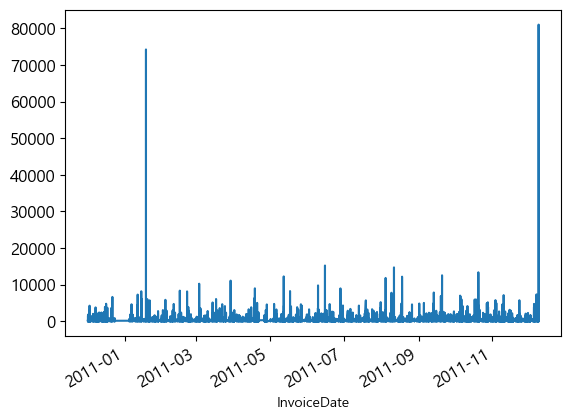

In [116]:
# 일자별 거래 수량을 확인(일단위 아니고 초단위임)
data_quantity_series = df.groupby('InvoiceDate')['Quantity'].sum()
data_quantity_series.plot()

<Axes: xlabel='InvoiceDate'>

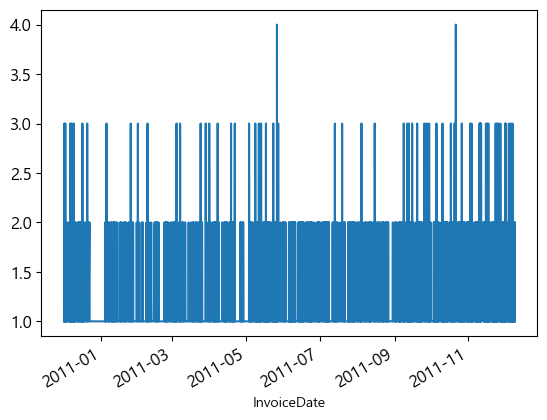

In [117]:
# 일자별 거래 건수를 확인(일단위 아니고 초단위임)
data_quantity_series = df.groupby('InvoiceDate')['InvoiceNo'].nunique()
data_quantity_series.plot()

<Axes: xlabel='InvoiceDate'>

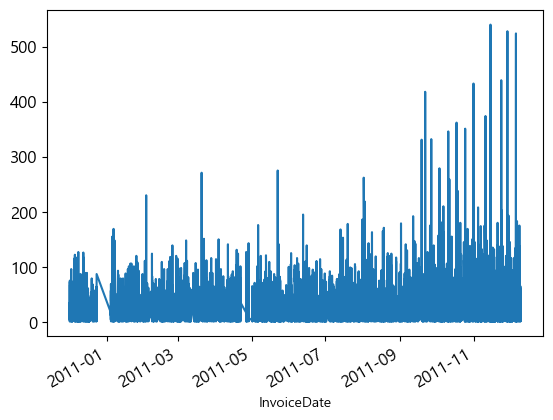

In [118]:
# 일자별 거래 수량을 확인(일단위 아니고 초단위임)
data_unique_series = df.groupby('InvoiceDate')['StockCode'].nunique()
data_unique_series.plot()

<Axes: xlabel='date'>

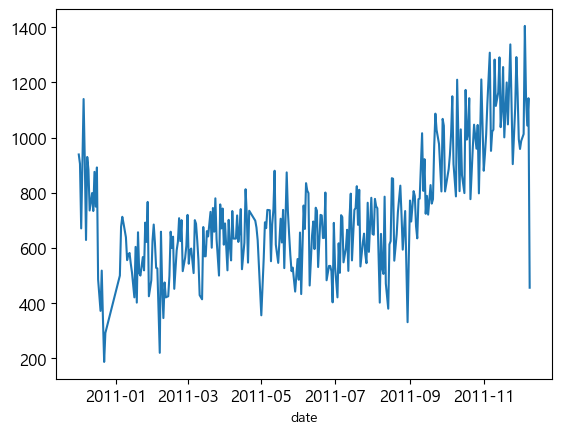

In [119]:
# 기존의 InvoiceDate는 초단위까지 있기 때문에 일자별로 확인하기 위해 date라는 칼럼을 생성해서 다시 그래프 그리기

df['date']=df['InvoiceDate'].dt.date
data_unique_series = df.groupby('date')['StockCode'].nunique()
data_unique_series.plot()

In [120]:
# 데이터의 시작시점과 끝시점의 날짜 확인
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


<Axes: xlabel='date'>

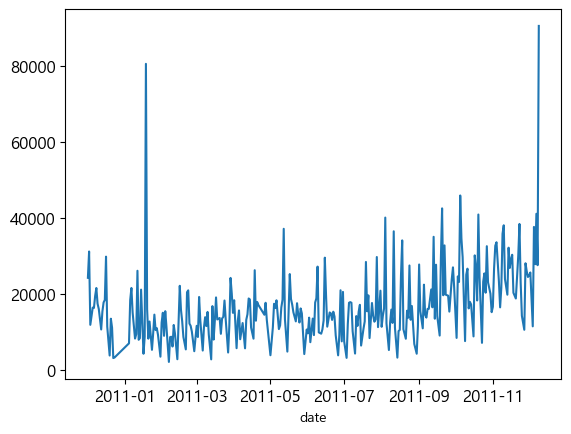

In [121]:
# 날짜 별로 거래 수량의 합을 확인
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<Axes: xlabel='date'>

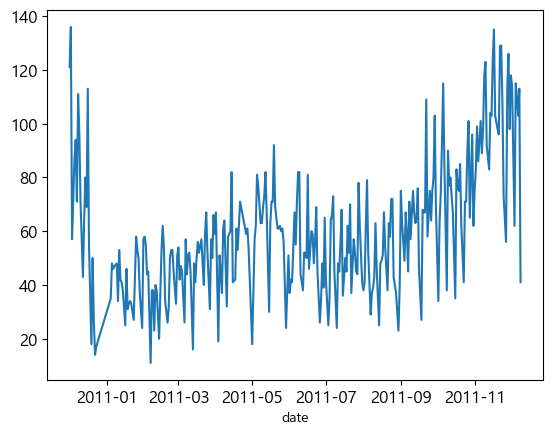

In [122]:
# 날짜 별로 거래 횟수를 확인
data_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
data_transaction_series.plot()

In [125]:
# 유저 별 거래 횟수를 탐색
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

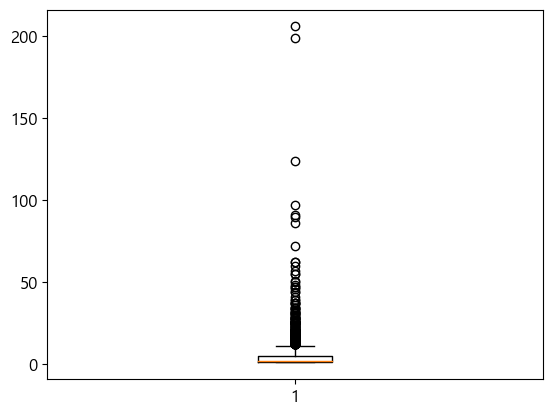

In [126]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [127]:
# 유저 별 아이템 종류 개수를 탐색
customer_unique_transaction_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

In [129]:
# 거래가 가장 많은 상품 TOP 10 탐색
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]



StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

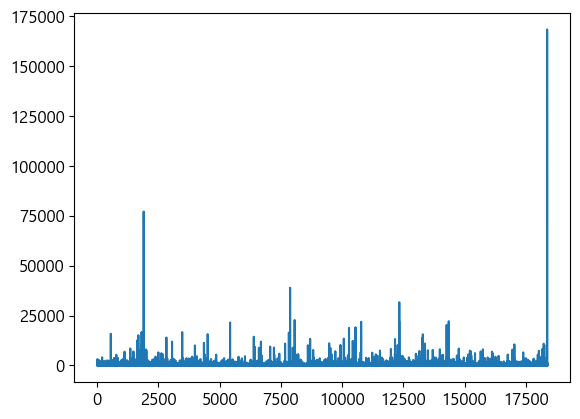

In [130]:
# 파생 변수 생성 - 다른 속성을 가지고 계산이 가능한 필드를 추가
# 관계형 데이터베이스 모델링에서는 이런 필드를 생성하지 말라고 하지만
# Customizing 과정에서는 자주 사용된다면 미리 만들어두는 것이 효율이 좋다라고 함

df['amount'] = df['Quantity'] * df['UnitPrice']
plt.plot(df.groupby('InvoiceNo')['amount'].sum().values)

In [133]:
# 데이터를 특정 시점으로 분리 - 2011년 11월 1일을 기준으로 분리

import datetime

df_year_round = df[df['date'] < datetime.date(2011,11,1)]
df_year_end = df[df['date'] >= datetime.date(2011,11,1)]
print(df_year_round.head())
print(df_year_end.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  ContainDigit  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom          True   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom          True   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom          True   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom          True   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom          True   

         date  amount  
0  2010-12-01   15.30  
1  2010-12-01   20.34  
2  2010-12-01   22.00  
3  2010-

In [134]:
# 11월 이전 데이터에서 고객 아이디 별로 상품 ID를 하나씩만 존재하도록 수정 -> set 이용
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {22805, 21791, 23146, 71477, 21832, 21731, 228...
12348    {21213, 22952, 21981, 23077, 21985, 21980, 849...
12350    {79191C, 21832, 22412, 21864, 84086C, 22557, 2...
12352    {22692, 22979, 22413, 22624, 22853, 84050, 227...
                               ...                        
18280    {22467, 22727, 82484, 22725, 22358, 22611, 224...
18281    {22467, 22716, 23007, 22037, 22028, 23008, 23209}
18282    {21108, 23187, 22089, 21109, 21270, 22424, 23295}
18283    {22758, 22065, 22750, 23235, 23510, 21828, 218...
18287    {22758, 22065, 22752, 23223, 21232, 23310, 215...
Name: StockCode, Length: 3970, dtype: object


In [135]:
# 11월 이전에 구매한 상품 코드를 이후에 구매한 상품 코드와 구분을 하기 위해서 old를 추가
# 고객 아이디별로 구매한 상품을 디셔너리로 만들 것인데 예전에 산 항목을 구분하기 위해서
# old를 값으로 추가

customer_item_dict = {}

# 11월 이전에 구매한 상품은 'old'라고 표기합니다.
for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'

print(str(customer_item_dict)[:100] + "...")


{'12346': {'23166': 'old'}, '12347': {'22805': 'old', '21791': 'old', '23146': 'old', '71477': 'old'...


In [137]:
# 11월 이후에 구매한 상품의 중복을 제거
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_end_set)

# 11월 이전에만 구매한 상품은 old 11월 이후에만 구매한 상품은 new
# 양쪽 다 구매한 것이면 both를 value로 추가 - 주기를 파악할 필요가 있음

for customer_id, stocks in customer_item_end_set.items():
    # 11월 이전 구매기록이 있는 유저인지를 체크
    # customer_item_dict는 customer_id를 key로 가지고 구매한 상품을 dict로 가지고 있음
    # 이 경우는 이전에 구매한 상품인지 확인이 필요
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            # 구매한 적 있는 상품인지를 체크한 뒤, 상태를 표기
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
    
    # 11월 이전 구매기록이 없는 유저라면 모두 'new'로 표기
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'

print(str(customer_item_dict)[:100] + "...")

CustomerID
12347    {23508, 23506, 20719, 23497, 84625A, 21064, 21...
12349    {22692, 22557, 22333, 23273, 23497, 48194, 212...
12352    {22627, 22668, 23368, 22624, 22982, 23559, 230...
12356                                       {22423, 21843}
12357    {35598B, 22315, 22028, 22024, 37448, 22714, 22...
                               ...                        
18272    {22993, 22961, 23358, 23495, 23113, 23240, 229...
18273                                             {79302M}
18274    {21231, 21108, 22851, 22423, 22720, 84988, 229...
18282                  {22423, 23174, 22699, 23175, 22818}
18283    {23510, 23202, 21907, 23201, 22554, 21791, 232...
Name: StockCode, Length: 1904, dtype: object
{'12346': {'23166': 'old'}, '12347': {'22805': 'old', '21791': 'old', '23146': 'old', '71477': 'old'...


In [138]:
# 고객별로 old와 new와 both의 개수를 파악
# 'old', 'new', 'both'를 유저별로 탐색하여 데이터 프레임을 생성

columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

# 데이터 프레임을 생성하는 과정
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    # 딕셔너리의 상품 상태(old, new, both)를 체크하여 데이터 프레임에 append 할 수 있는 형태로 처리
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else:
            both += 1
    
    # df_order_info에 데이터를 append
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head() # old에만 데이터가 존재하는 경우 할인 쿠폰 같은 것을 전송

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7916\3544744860.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_o

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [141]:
# 전체 유저 수
print(df_order_info.shape[0])

# 11월 이후에 새로운 상품을 구매한 유저 수
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])

# 동일한 제품을 재구매한 고객 수 - 이 고객들은 구매 주기를 확인해볼 필요가 있음
# 식료품이라면 미리 알림을 주는 것도 좋은 마케팅 방법 중 하나
# 동일한 식료품이지만 품질이 더 좋거나 싼 제품을 추천하기도 함
print(df_order_info[df_order_info['both'] > 0].shape[0])

4334
1446
1426


In [142]:
# 11월 이후에 어떤 상품을 새로 구매를 많이 했는지 확인
# 각 년도별 월 단위도 체크를 해야 함
# 이전 몇 개월 동안 구매하지 않다가 특정 월 이후에 구매하는 경우는 계절성 상품
df_order_info['new'].value_counts()

0      2521
1        81
3        73
2        72
8        65
       ... 
116       1
157       1
124       1
130       1
99        1
Name: new, Length: 133, dtype: int64

In [143]:
# 유저의 수와 상품의 수 파악
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


In [144]:
# 추천 시스템을 만들 때는 유저와 상품 그리고 평점이 존재해야 함
# 쇼핑몰에서는 평점 대신에 구매 횟수를 사용하기도 함
# index가 겹칠 수도 있어서 reset_index()를 붙여줌
uir_df = df_year_round.groupby(['CustomerID','StockCode'])['InvoiceNo'].nunique().reset_index()
print(uir_df)



       CustomerID StockCode  InvoiceNo
0           12346     23166          1
1           12347     16008          1
2           12347     17021          1
3           12347     20665          1
4           12347     20719          3
...           ...       ...        ...
220902      18287     84920          1
220903      18287    85039A          2
220904      18287    85039B          2
220905      18287    85040A          1
220906      18287     85173          1

[220907 rows x 3 columns]


array([[<Axes: title={'center': 'InvoiceNo'}>]], dtype=object)

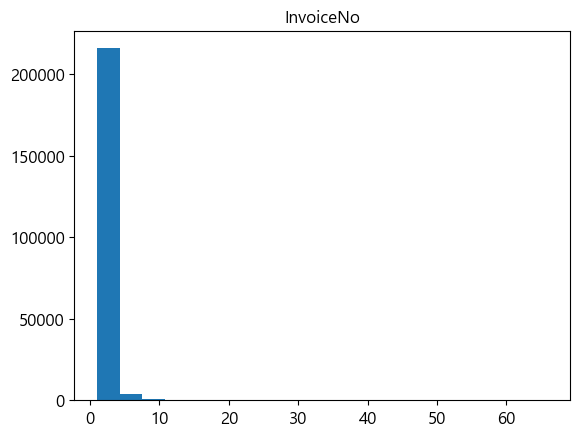

In [145]:
# 분포 확인 - 구매는 1번인 경우가 아주 많음
# 예측을 할 때 타겟은 정규 분포인 경우가 가장 잘 하게 됨
# 타겟값의 편차가 너무 크거나 한 쪽에 쏠린 경우 로그 변환 등을 수행
uir_df.hist(bins=20,grid=False)

<Axes: >

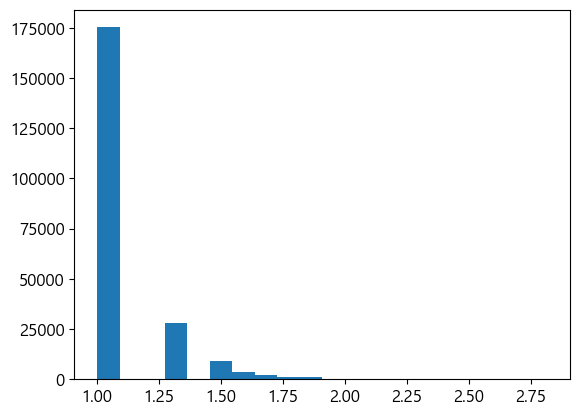

In [146]:
# 로그 변환 수행
uir_df['InvoiceNo'].apply(lambda x : np.log10(x) + 1).hist(bins=20, grid=False)

<Axes: >

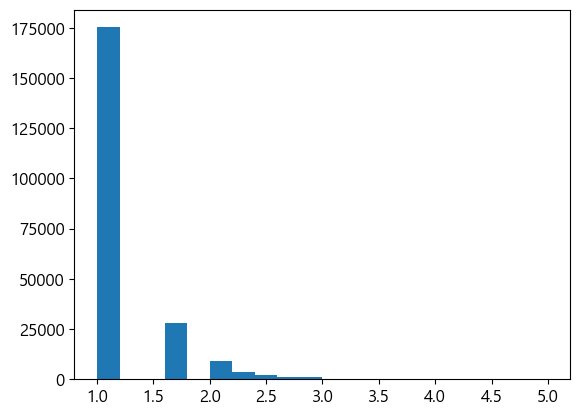

In [147]:
# 평점 만들기 - 로그 변환을 수행하고 1 ~ 5 사이의 값으로 생성
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)
# 5를 곱하면 0~5가 나오기 때문에 4를 곱해주고 +1 해주기
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) / (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1
uir_df['Rating'].hist(bins=20, grid=False)

In [148]:
# 추천 알고리즘이 사용할 데이터 생성
uir_df = uir_df[['CustomerID','StockCode','Rating']]
print(uir_df.head())

  CustomerID StockCode    Rating
0      12346     23166  1.000000
1      12347     16008  1.000000
2      12347     17021  1.000000
3      12347     20665  1.000000
4      12347     20719  2.048881


In [152]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성
# 대략적인 성능을 알아보기 위해 학습 데이터와 테스트 데이터를 8:2로 분할
# rating_scale=(1, 5) -> 평점의 범위
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습
train_start = time.time()
# n_factors는 요인의 수로 기본값은 100
# lr_all은 학습률
# reg_all : 정규화 항으로 클수록 파라미터를 작게 추정, 기본값은 0.02
# n_epochs : 수행 횟수
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("훈련 시간:", train_end-train_start)

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력하여 모델의 성능을 평가
print(accuracy.rmse(predictions))

훈련 시간: 9.685100555419922
RMSE: 0.3385
0.33845826350124686


In [153]:
# 전체 데이터를 가지고 훈련
# train_data는 내부적으로 2개의 함수를 이용해서 이전에 구매했던 제품과 이전에 구매하지 않았던 제품을 분할할 수 있음
# 이전에 구매하지 않은 데이터는 build_anti_testset
# 이전에 구매한 데이터는 build_testset()

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습
train_start = time.time()
# n_factors는 요인의 수로 기본값은 100
# lr_all은 학습률
# reg_all : 정규화 항으로 클수록 파라미터를 작게 추정, 기본값은 0.02
# n_epochs : 수행 횟수
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("훈련 시간:", train_end-train_start)

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력하여 모델의 성능을 평가
print(accuracy.rmse(predictions))

훈련 시간: 7.133270740509033
RMSE: 0.2625
0.2624706141379036


In [154]:
# 이전에 구매하지 않았던 항목을 가지고 예측
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)
print(target_user_predictions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [155]:
# 구매 예측 결과를 디셔너리로 변환해서 보기 좋게 출력

new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating

print(str(new_order_prediction_dict)[:300] + "...")

{'12346': {'16008': 1.0252693556752834, '17021': 1.1684331910331216, '20665': 1.0427802612081103, '20719': 1.1576690073644904, '20780': 1.0035930065479701, '20782': 1.1534484876197295, '20966': 1.0502735796655136, '21035': 1.0555147730050294, '21041': 1.058379114805869, '21064': 1.111455062186792, '...


In [ ]:
# 이전에 구매했었던 상품을 예측의 대상으로 선정
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)
